In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns; sns.set()  # for plot styling
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [4]:
loan = pd.read_csv("C:/Users/user/Desktop/loan_data.csv")
loan

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [5]:
loan.shape

(9578, 14)

In [6]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1010.2+ KB


In [7]:
loan.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [8]:
pd.crosstab(loan["fico"], loan["not.fully.paid"], margins=True)

not.fully.paid,0,1,All
fico,,,
612,2,0,2
617,0,1,1
622,1,0,1
627,1,1,2
632,2,4,6
637,3,2,5
642,73,29,102
647,75,37,112
652,93,38,131


In [9]:
pd.crosstab(loan["dti"], loan["not.fully.paid"], margins=True)

not.fully.paid,0,1,All
dti,,,
0.0,68,21,89
0.01,0,1,1
0.02,1,0,1
0.03,1,0,1
0.04,2,0,2
...,...,...,...
29.74,1,0,1
29.9,1,0,1
29.95,1,0,1


In [10]:
pd.crosstab(loan["revol.util"], loan["not.fully.paid"], margins=True)

not.fully.paid,0,1,All
revol.util,,,
0.0,244,53,297
0.04,1,0,1
0.1,15,6,21
0.2,15,5,20
0.3,21,1,22
...,...,...,...
106.4,1,0,1
106.5,0,1,1
108.8,1,0,1


Text(0.5, 6.799999999999979, 'FICO')

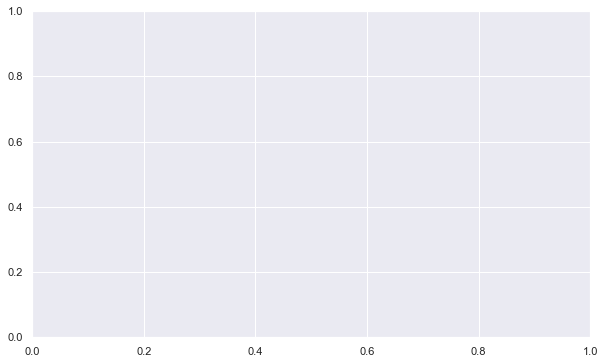

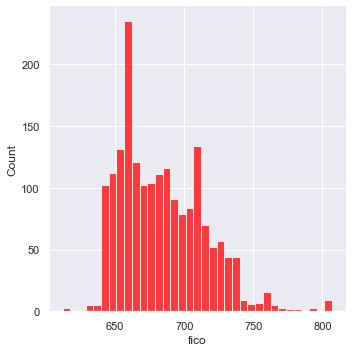

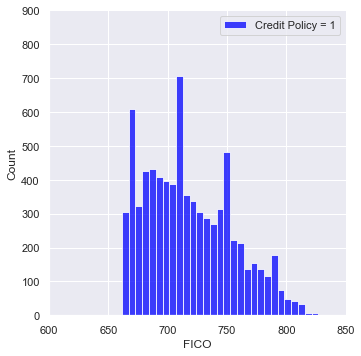

In [11]:
plt.subplots(figsize = (10,6))
sns.displot(loan[loan['credit.policy'] == 0]['fico'], bins = 35, kde = False, color = 'red', label = 'Credit Policy = 0')
sns.displot(loan[loan['credit.policy'] == 1]['fico'], bins = 35, kde = False, color = 'blue', label = 'Credit Policy = 1')
plt.xlim(600,850)
plt.ylim(0,900)
plt.legend(loc = 0)
plt.xlabel('FICO')

c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'FICO')

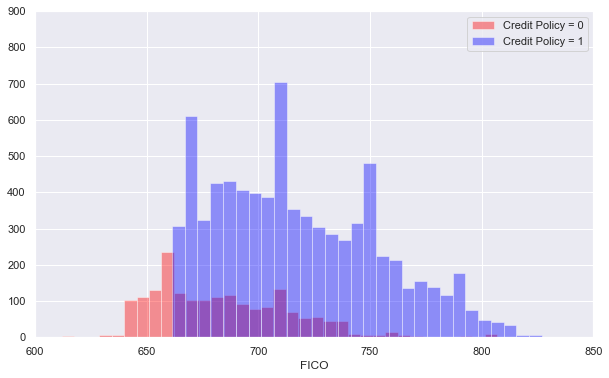

In [12]:
plt.subplots(figsize = (10,6))
sns.distplot(loan[loan['credit.policy'] == 0]['fico'], bins = 35, kde = False, color = 'red', label = 'Credit Policy = 0')
sns.distplot(loan[loan['credit.policy'] == 1]['fico'], bins = 35, kde = False, color = 'blue', label = 'Credit Policy = 1')
plt.xlim(600,850)
plt.ylim(0,900)
plt.legend(loc = 1)
plt.xlabel('FICO')

Text(0.5, 6.799999999999979, 'FICO')

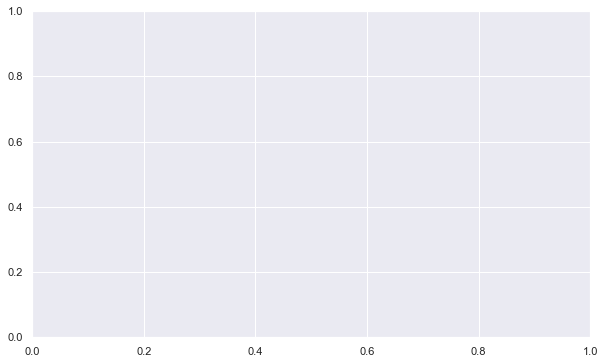

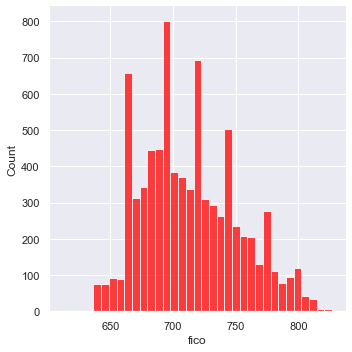

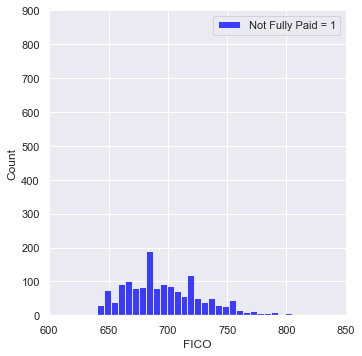

In [13]:
plt.subplots(figsize = (10,6))
sns.displot(loan[loan['not.fully.paid'] == 0]['fico'], bins = 35, kde = False, color = 'red', label = 'Not Fully Paid = 0')
sns.displot(loan[loan['not.fully.paid'] == 1]['fico'], bins = 35, kde = False, color = 'blue', label = 'Not Fully Paid = 1')
plt.xlim(600,850)
plt.ylim(0,900)
plt.legend(loc = 1)
plt.xlabel('FICO')

c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'FICO')

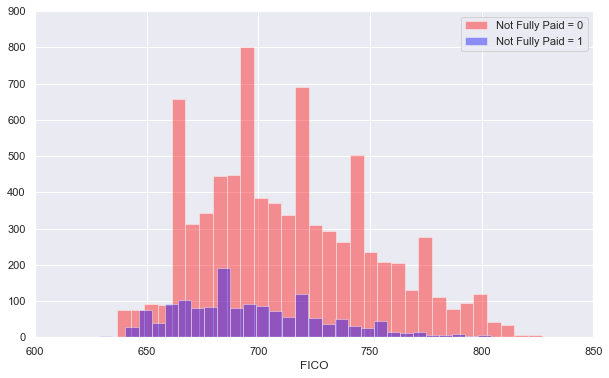

In [14]:
plt.subplots(figsize = (10,6))
sns.distplot(loan[loan['not.fully.paid'] == 0]['fico'], bins = 35, kde = False, color = 'red', label = 'Not Fully Paid = 0')
sns.distplot(loan[loan['not.fully.paid'] == 1]['fico'], bins = 35, kde = False, color = 'blue', label = 'Not Fully Paid = 1')
plt.xlim(600,850)
plt.ylim(0,900)
plt.legend(loc = 1)
plt.xlabel('FICO')

<AxesSubplot:xlabel='purpose', ylabel='count'>

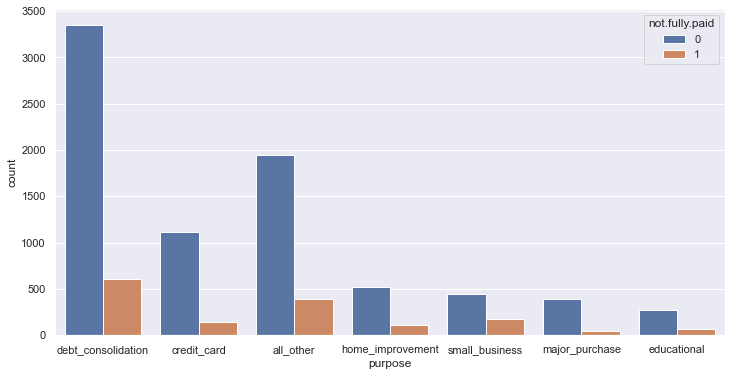

In [15]:
plt.subplots(figsize = (12,6))
sns.countplot(x = 'purpose', hue = 'not.fully.paid', data = loan)

# Now, let's check the count of fico with not fully paid


<AxesSubplot:xlabel='fico', ylabel='count'>

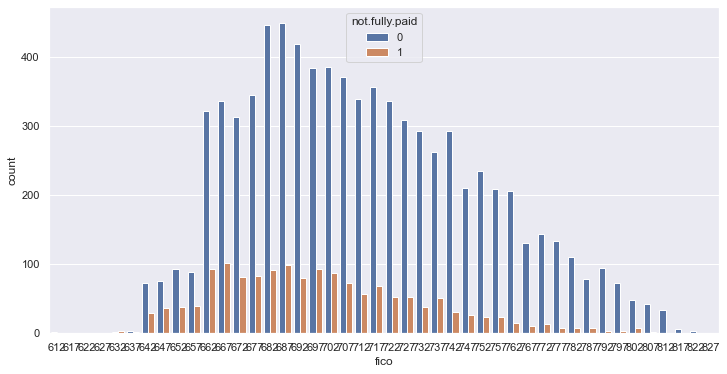

In [16]:
plt.subplots(figsize = (12,6))
sns.countplot(x = 'fico', hue = 'not.fully.paid', data = loan)

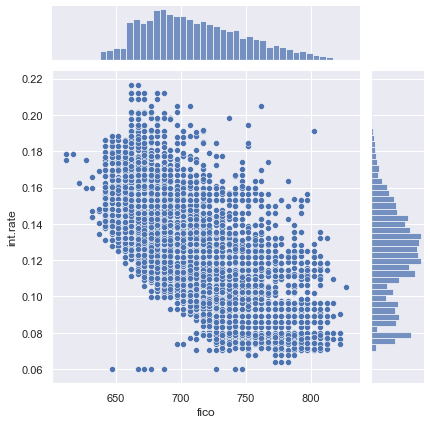

In [18]:
#trend between fico and interest rate if it actually affects the payment of tthe loan
sns.jointplot(x = 'fico', y = 'int.rate', data = loan)

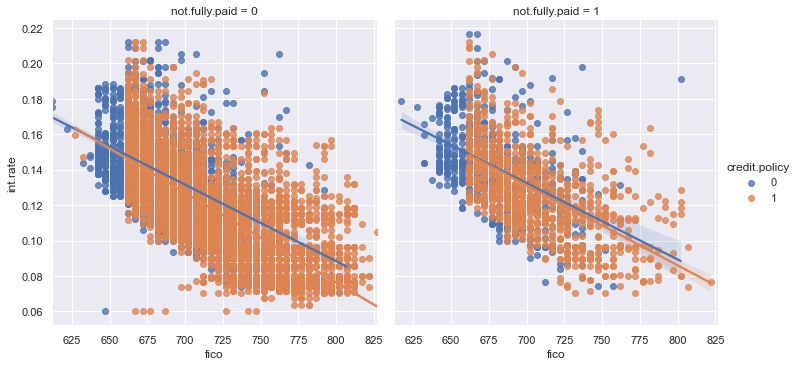

In [17]:
sns.lmplot(x = 'fico', y = 'int.rate', col = 'not.fully.paid', hue = 'credit.policy', data = loan)

In [18]:
cat_feats = ['purpose']

In [19]:
loans = pd.get_dummies(loan, columns = cat_feats, drop_first = True)

In [20]:
loans.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [29]:
loans['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import sklearn.linear_model
import sklearn.ensemble
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [22]:
#separating the independent and dependent variable
X = loans.drop('not.fully.paid', axis = 1)
y = loans['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 , random_state= 101)

In [30]:
y_train.value_counts()

0    5614
1    1090
Name: not.fully.paid, dtype: int64

In [31]:
#disribution in training set
y_train.value_counts(normalize=True)

0    0.837411
1    0.162589
Name: not.fully.paid, dtype: float64

In [32]:
#distribution in test set
y_test.value_counts(normalize=True)

0    0.845859
1    0.154141
Name: not.fully.paid, dtype: float64

In [35]:
X_train.shape, y_train.shape

((6704, 18), (6704,))

In [36]:
X_test.shape, y_test.shape

((2874, 18), (2874,))

In [37]:
from sklearn.tree import DecisionTreeRegressor

In [24]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [39]:
estimator = []
estimator.append(('cart',dtree))

svm_model=SVC().fit(X_train,y_train)
estimator.append(('svm',svm_model))

logmodel = LogisticRegression().fit(X_train,y_train)
estimator.append(('logistic', logmodel))

ensemble = VotingClassifier(estimator)
ensemble.fit(X_train,y_train)

c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

VotingClassifier(estimators=[('cart', DecisionTreeClassifier()), ('svm', SVC()),
                             ('logistic', LogisticRegression())])

In [40]:
pred_dec=dtree.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred_dec)

0.732776617954071

In [41]:
svm_pred=svm_model.predict(X_test)
accuracy_score(y_test,svm_pred)

0.8462073764787752

In [42]:
log_pred=logmodel.predict(X_test)
accuracy_score(y_test,log_pred)

0.8472512178148921

In [43]:
Voting_pred=ensemble.predict(X_test)
accuracy_score(y_test,Voting_pred)

0.8462073764787752

In [46]:
y_predict = dtree.predict(X_test)
y_predict

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
from sklearn.metrics import confusion_matrix, classification_report

In [48]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [49]:
print(confusion_matrix(y_test, y_predict))

[[2006  425]
 [ 343  100]]


In [50]:
print(confusion_matrix(y_test, pred_dec))

[[2006  425]
 [ 343  100]]
